Amazon Food Review

In [2]:
import os
os.path.abspath(os.getcwd())





'''
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)
'''

!mkdir -p ~/.kaggle



!kaggle datasets download -d snap/amazon-fine-food-reviews



!unzip amazon-fine-food-reviews

Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
 98% 237M/242M [00:02<00:00, 82.1MB/s]
100% 242M/242M [00:02<00:00, 90.5MB/s]
Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [3]:
import sqlite3

conn = sqlite3.connect('/content/database.sqlite')
print("Opened database successfully")

import pandas as pd
dataset = pd.read_sql_query("SELECT * FROM Reviews limit 5000", conn)

dataset.to_csv("Reviews.csv", index = False)
dataset

Opened database successfully


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
4995,4996,B00653KJ5M,AGE64SY3HP9RV,CZ,1,1,2,1341273600,The cavemen must have been wealthy,I really wanted to like these.<br /><br />Firs...
4996,4997,B00653KJ5M,A1MPEPNJ2NKWM,Rachel Albert Matesz,1,1,1,1341100800,These cookies need work; you can make your own...,I was not impressed with these cookies when I ...
4997,4998,B00653KJ5M,A1T6I625FGQS20,IL,1,1,3,1336694400,Okay in a pinch - not great,The cookies came sealed and seem to be high qu...
4998,4999,B00653KJ5M,A3POAWC2JPQQQP,me,0,0,4,1342137600,"they are good (except for the ""rainforest"" fla...","These taste very good, but aren't like the BES..."


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 5000 non-null   object
 9   Text                    5000 non-null   object
dtypes: int64(5), object(5)
memory usage: 390.8+ KB


In [5]:
dataset.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [6]:
dataset.duplicated().sum()


0

In [7]:
dataset.Score.value_counts()


,count
Score,
5,3134
4,712
1,469
3,395
2,290


<Axes: xlabel='Score'>

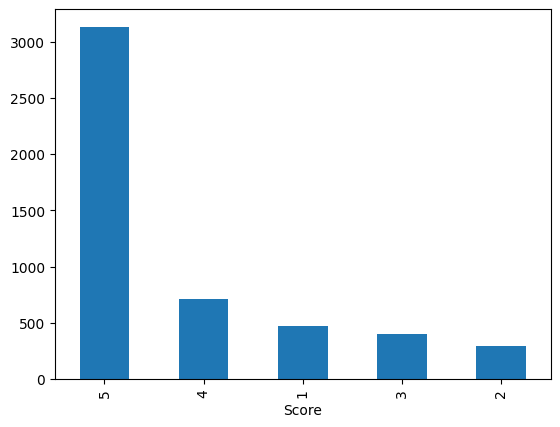

In [8]:
dataset.Score.value_counts().plot(kind = 'bar')


<Axes: xlabel='Score'>

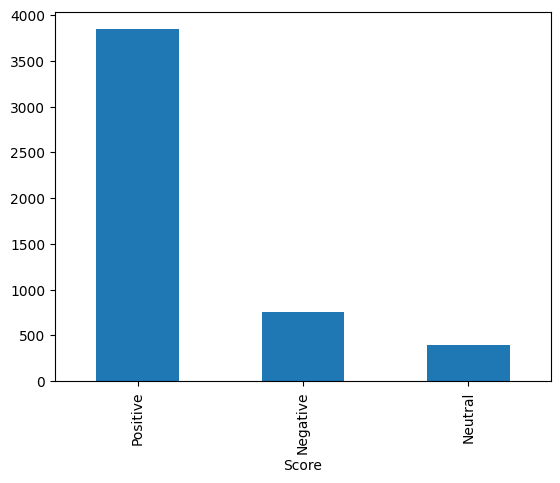

In [9]:
import numpy as np
dataset.Score = np.where(dataset.Score > 3, 'Positive', np.where(dataset.Score < 3 , 'Negative' ,'Neutral' ))

dataset.Score.value_counts().plot(kind = 'bar')





In [10]:
dataset.Score.value_counts()

,count
Score,
Positive,3846
Negative,759
Neutral,395


In [11]:
dataset.Summary[2]

'"Delight" says it all'

In [12]:
dataset.Text[2]

'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.'

In [13]:
final_dataset = dataset[['Score', 'Summary', 'Text']]
final_dataset.head()


,Score,Summary,Text
0,Positive,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Negative,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,Positive,"""Delight"" says it all",This is a confection that has been around a fe...
3,Negative,Cough Medicine,If you are looking for the secret ingredient i...
4,Positive,Great taffy,Great taffy at a great price. There was a wid...


In [14]:
for i in range(5):
  print(final_dataset.Text[i])
  print()

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.

If you are looking for the secre

In [17]:
for i in range(100):
  print(final_dataset.Text[i])
  print()

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.

If you are looking for the secre

In [18]:
from bs4 import BeautifulSoup

def preprocessing():
    # Apply BeautifulSoup to remove HTML tags in one go for the entire column
    final_dataset['Summary'] = final_dataset['Summary'].apply(lambda x: BeautifulSoup(x).get_text())
    final_dataset['Text'] = final_dataset['Text'].apply(lambda x: BeautifulSoup(x).get_text())

    # Convert text to lowercase for both columns
    final_dataset['Summary'] = final_dataset['Summary'].str.lower()
    final_dataset['Text'] = final_dataset['Text'].str.lower()

    # Remove punctuation
    final_dataset['Summary'] = final_dataset['Summary'].str.replace('[^\w\s]', '', regex=True)
    final_dataset['Text'] = final_dataset['Text'].str.replace('[^\w\s]', '', regex=True)

    # Remove digits
    final_dataset['Summary'] = final_dataset['Summary'].str.replace('\d+', '', regex=True)
    final_dataset['Text'] = final_dataset['Text'].str.replace('\d+', '', regex=True)

    # Remove extra spaces (multiple spaces) by replacing them with a single space
    final_dataset['Summary'] = final_dataset['Summary'].str.replace('\s+', ' ', regex=True)
    final_dataset['Text'] = final_dataset['Text'].str.replace('\s+', ' ', regex=True)

    # Trim leading and trailing whitespace
    final_dataset['Summary'] = final_dataset['Summary'].str.strip()
    final_dataset['Text'] = final_dataset['Text'].str.strip()

    # Preview the first few rows of the processed DataFrame
    print(final_dataset.head())

    # Save the cleaned dataset to a CSV file
    final_dataset.to_csv("final_dataset.csv", index=False)

    return final_dataset

# Run the preprocessing function
preprocessing()


<ipython-input-18-554425aec6fa>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  final_dataset['Summary'] = final_dataset['Summary'].apply(lambda x: BeautifulSoup(x).get_text())
<ipython-input-18-554425aec6fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['Summary'] = final_dataset['Summary'].apply(lambda x: BeautifulSoup(x).get_text())
<ipython-input-18-554425aec6fa>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  final_dataset['Text'] = final_dataset['Text'].apply(lambda x: BeautifulSoup(x).get_text())
<i

      Score                Summary  \
0  Positive  good quality dog food   
1  Negative      not as advertised   
2  Positive    delight says it all   
3  Negative         cough medicine   
4  Positive            great taffy   

                                                Text  
0  i have bought several of the vitality canned d...  
1  product arrived labeled as jumbo salted peanut...  
2  this is a confection that has been around a fe...  
3  if you are looking for the secret ingredient i...  
4  great taffy at a great price there was a wide ...  


<ipython-input-18-554425aec6fa>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['Text'] = final_dataset['Text'].str.replace('\s+', ' ', regex=True)
<ipython-input-18-554425aec6fa>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['Summary'] = final_dataset['Summary'].str.strip()
<ipython-input-18-554425aec6fa>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,Score,Summary,Text
0,Positive,good quality dog food,i have bought several of the vitality canned d...
1,Negative,not as advertised,product arrived labeled as jumbo salted peanut...
2,Positive,delight says it all,this is a confection that has been around a fe...
3,Negative,cough medicine,if you are looking for the secret ingredient i...
4,Positive,great taffy,great taffy at a great price there was a wide ...
...,...,...,...
4995,Negative,the cavemen must have been wealthy,i really wanted to like thesefirst off these c...
4996,Negative,these cookies need work you can make your own ...,i was not impressed with these cookies when i ...
4997,Neutral,okay in a pinch not great,the cookies came sealed and seem to be high qu...
4998,Positive,they are good except for the rainforest flavor,these taste very good but arent like the best ...


In [19]:
def tokentization():
  import nltk
  nltk.download('all')
  from nltk.tokenize import word_tokenize
  final_dataset['Summary'] = final_dataset['Summary'].apply(lambda x: word_tokenize(x))
  final_dataset['Text'] = final_dataset['Text'].apply(lambda x: word_tokenize(x))

  from nltk.corpus import stopwords

  stop_words = set(stopwords.words('english'))
  final_dataset['Summary'] = final_dataset['Summary'].apply(lambda x: [word for word in x if word not in stop_words])
  final_dataset['Text'] = final_dataset['Text'].apply(lambda x: [word for word in x if word not in stop_words])
  final_dataset.head()

  from nltk.stem import WordNetLemmatizer

  lemmatizer = WordNetLemmatizer()

  final_dataset['Summary'] = final_dataset['Summary'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
  final_dataset['Text'] = final_dataset['Text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
  final_dataset.head()


  return final_dataset

tokentization()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

,Score,Summary,Text
0,Positive,"[good, quality, dog, food]","[bought, several, vitality, canned, dog, food,..."
1,Negative,[advertised],"[product, arrived, labeled, jumbo, salted, pea..."
2,Positive,"[delight, say]","[confection, around, century, light, pillowy, ..."
3,Negative,"[cough, medicine]","[looking, secret, ingredient, robitussin, beli..."
4,Positive,"[great, taffy]","[great, taffy, great, price, wide, assortment,..."
...,...,...,...
4995,Negative,"[caveman, must, wealthy]","[really, wanted, like, thesefirst, cooky, size..."
4996,Negative,"[cooky, need, work, make, home]","[impressed, cooky, tried, first, came, company..."
4997,Neutral,"[okay, pinch, great]","[cooky, came, sealed, seem, high, quality, ing..."
4998,Positive,"[good, except, rainforest, flavor]","[taste, good, arent, like, best, thing, ever, ..."


In [21]:
final_dataset['Review'] = final_dataset['Summary'].apply(lambda x: ' '.join(x)) + ' ' + final_dataset['Text'].apply(lambda x: ' '.join(x))
final_dataset.drop(['Summary', 'Text'], axis=1, inplace=True)
final_dataset.head()

<ipython-input-21-5fc462e8952b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['Review'] = final_dataset['Summary'].apply(lambda x: ' '.join(x)) + ' ' + final_dataset['Text'].apply(lambda x: ' '.join(x))
<ipython-input-21-5fc462e8952b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset.drop(['Summary', 'Text'], axis=1, inplace=True)


,Score,Review
0,Positive,good quality dog food bought several vitality ...
1,Negative,advertised product arrived labeled jumbo salte...
2,Positive,delight say confection around century light pi...
3,Negative,cough medicine looking secret ingredient robit...
4,Positive,great taffy great taffy great price wide assor...


In [22]:


from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
matrix = tfidf.fit_transform(final_dataset['Review'], tfidf.get_feature_names_out()[10000])
matrix.shape


NotFittedError: Vocabulary not fitted or provided

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
# Fit and transform in one step, without specifying feature names beforehand
matrix = tfidf.fit_transform(final_dataset['Review'])
# Access feature names after fitting
feature_names = tfidf.get_feature_names_out()
# Now you can select a specific feature if needed, e.g., feature_names[10000]
matrix.shape
feature_names

array(['_effect_', 'aa', 'aahhhs', ..., 'zupas', 'zuppa', 'îts'],
      dtype=object)

In [26]:
final_dataset['Score'].value_counts()

,count
Score,
Positive,3846
Negative,759
Neutral,395


In [28]:
final_dataset['Score'] = final_dataset['Score'].map({'Positive': 1, 'Negative': -1, 'Neutral':0})
final_dataset['Score'].value_counts()

<ipython-input-28-788d3f64a1ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset['Score'] = final_dataset['Score'].map({'Positive': 1, 'Negative': -1, 'Neutral':0})


,count
Score,
1,3846
-1,759
0,395


In [46]:
x =  matrix.toarray()
y = final_dataset['Score']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)



In [47]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4000, 15898), (1000, 15898), (4000,), (1000,))

In [48]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
# !pip install tensorflow

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

# Remove the 'validation' argument and keep 'validation_split' or 'validation_data'
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


124/125 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7721 - loss: 0.6045

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.7721 - loss: 0.6023 - val_accuracy: 0.7690 - val_loss: 0.0963
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.7611 - loss: -0.6771 - val_accuracy: 0.7690 - val_loss: -1.2401
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.7690 - loss: -6.1193 - val_accuracy: 0.7690 - val_loss: -4.7458
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.7693 - loss: -22.8741 - val_accuracy: 0.7690 - val_loss: -14.4766
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7577 - loss: -66.8978 - val_accuracy: 0.7690 - val_loss: -29.2650
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.7775 - loss: -122.5967 - val_accuracy: 0.7690 - val_loss: -52.0699
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7703 - loss: -241.2214 - val_accuracy: 0.7690 - val_loss: -92.3183
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.7673 - loss: -397.6